### Quiz 1

Consider $\displaystyle r = \frac{1 + \sqrt{5}}{2}$.

1. Compute a rational approximation for $r$, accurate to 2 decimal places.

2. Verify that the accuracy of your rational approximation is 2 decimal places.

   Write an explanation for your verification.

3. Compute the sequence 
   of the first ten consecutive rational approximations for $r$,
   accurate respectively with 1, 2, up to 10 decimal places (10 included).

**answer to question 1**

In [1]:
r = (1 + sqrt(5))/2
show(r)

1/2*sqrt(5) + 1/2

In [2]:
a = QQ(r.n(digits=2))
show(a)

55/34

**answer to question 2**

In [3]:
err = abs(r - a)/abs(r)
err.n(digits=2)

0.00

In [4]:
err.n(digits=3)

0.000226

We computed in ``err`` the relative error of the approximation ``a`` of the number ``r``.  Evaluated in with 2 decimal places of accuracy, we see that the error is ``0.00``.
Alternatively, evaluate the error with 3 decimal places, we see that the error is $2 \times 10^{-4}$.  Thus, the accuracy of the approximation is (at least) 2 decimal places.

**answer to question 3**

In [5]:
[QQ(r.n(digits=k)) for k in range(1, 11)]

[13/8,
 55/34,
 233/144,
 377/233,
 1597/987,
 4181/2584,
 17711/10946,
 46368/28657,
 196418/121393,
 514229/317811]

### Quiz 2

Quiz 2 MCS 320 Wednesday 25 June 2025

1. Does $p = x^2 + x + 3$ factor over ${\mathbb Q}[x]$?

   Extend $\mathbb Q$ with a formal root of $p$.  What is the other root of $p$?

2. Make a fast callable object of
   $\displaystyle \frac{x y + 2}{x + y - 1}$
   and draw the expression tree.

**answer to question 1**

In [ ]:
R.<x> = QQ[x]
R

Univariate Polynomial Ring in x over Rational Field

In [ ]:
p = x^2 + x + 3
factor(p)

x^2 + x + 3

We see that $p$ does not factor.

In [ ]:
E.<a> = QQ.extension(p)
E

Number Field in a with defining polynomial x^2 + x + 3

In [ ]:
S.<y> = E[]
S

Univariate Polynomial Ring in y over Number Field in a with defining polynomial x^2 + x + 3

In [ ]:
q = S(p)
q

y^2 + y + 3

In [ ]:
factor(q)

(y - a) * (y + a + 1)

After adding `a` as a root of $p$, we see that $p$ factors over $E = {\mathbb Q}($ `a` $)$.

The other root added is $-$ `a` $-1$.

**answer to question 2**

In [ ]:
from sage.ext.fast_callable import ExpressionTreeBuilder
etb = ExpressionTreeBuilder(vars=['x', 'y'])
x = etb.var('x')
y = etb.var('y')
p = (x*y + 2)/(x + y - 1)
p

div(add(mul(v_0, v_1), 2), sub(add(v_0, v_1), 1))

In [ ]:
f = fast_callable(p)
f.op_list()

[('load_arg', 0),
 ('load_arg', 1),
 'mul',
 ('load_const', 2),
 'add',
 ('load_arg', 0),
 ('load_arg', 1),
 'add',
 ('load_const', 1),
 'sub',
 'div',
 'return']

We start with the leaves of the expression tree.

In [ ]:
Lx = LabelledBinaryTree([None, None], label='v_0')
Ly = LabelledBinaryTree([None, None], label='v_1')
L1 = LabelledBinaryTree([None, None], label='1')
L2 = LabelledBinaryTree([None, None], label='2')

In [ ]:
Nxtimesy = LabelledBinaryTree([Lx, Ly], label='mul')
ascii_art(Nxtimesy)

  _mul_
 /     \
v_0     v_1

In [ ]:
numerator = LabelledBinaryTree([Nxtimesy, L2], label='add')
ascii_art(numerator)

     ___add____
    /          \
  _mul_         2
 /     \        
v_0     v_1     

In [ ]:
Nxplusy = LabelledBinaryTree([Lx, Ly], label='add')
ascii_art(Nxplusy)

  _add_
 /     \
v_0     v_1

In [ ]:
denominator = LabelledBinaryTree([Nxplusy, L1], label='sub')
ascii_art(denominator)

     ___sub____
    /          \
  _add_         1
 /     \        
v_0     v_1     

In [ ]:
tree = LabelledBinaryTree([numerator, denominator], label='div')
ascii_art(tree)

          ________div________
         /                   \
     ___add____            ___sub____
    /          \          /          \
  _mul_         2       _add_         1
 /     \               /     \        
v_0     v_1           v_0     v_1     

### Quiz 3

Quiz 3 MCS 320 Monday 29 June 2025

**Question 1**

Let $\displaystyle \frac{1}{n} \sum_{k=1}^n 
      \ln\left( 1 + \frac{k}{n} \right) \approx \int_0^1 \ln(1 + x) dx$

where ``s = lambda n: float(sum([ln(1 + k/n) for k in range(1, n+1)]))/n``

is a function which defines the approximation for the integral.

1. Time the execution of `s` for $n = 10000$.
      Explain why `s` is inefficient.

2. Apply vectorization to improve the efficiency.  Verify the correctness.

   Time the execution of the vectorized function for $n = 10000$,
   compare with timings of `s`.

**answer to question 1**

In [ ]:
s = lambda n: float(sum([ln(1 + k/n) for k in range(1, n+1)]))/n

In [ ]:
timeit("s(10000)")

5 loops, best of 3: 691 ms per loop

The Python code is inefficient because all calculations are evaluated with exact rational arithmetic and only at the very end is a floating-point approximation computed.

In [ ]:
def vs(n):
    """
    Vectorized version of s.
    """
    from numpy import log, sum, arange
    x = arange(0, n+1)/n
    return sum(log(1+x))/n

Let us first verify the correctness

In [ ]:
s1 = s(10000)
s1

0.38632901806224984

In [ ]:
s2 = vs(10000)
s2

0.38632901806225195

In [ ]:
abs(s1-s2)

2.1094237467877974e-15

The error is about as small as the machine precision.

In [ ]:
timeit("vs(10000)")

625 loops, best of 3: 54.8 μs per loop

We observe a significant drop in execution time, from milliseconds to microseconds.

**Question 2**

Let $p = x^3 + 2 x + 3$ be a polynomial with coefficients
      in the integer number field modulo 17.  
      Is $p$ irreducible over ${\mathbb Z}_{17}$?

Extend the coefficient field with a formal root of $p$
so that, over this extended field, 
$p$ factors into a product of linear polynomials.

**answer to question 2**

In [ ]:
x = polygen(GF(17))
p = x^3 + 2*x + 3
p

x^3 + 2*x + 3

In [ ]:
p.is_irreducible()

False

We see that $p$ is reducible, let us then compute the factors.

In [ ]:
f = factor(p)
f

(x + 1) * (x^2 + 16*x + 3)

To extend ``GF(17)`` with a root of a quadratic factor, we list the factors.

In [ ]:
L = list(f)
L

[(x + 1, 1), (x^2 + 16*x + 3, 1)]

In [ ]:
f1 = L[0][0]
f2 = L[1][0]
(f1, f2)

(x + 1, x^2 + 16*x + 3)

Now we can extend ``GF(17)`` with a root of the quadratic factor.

In [ ]:
E.<a> = GF(17).extension(f2)
E

Finite Field in a of size 17^2

In [ ]:
q = E[x](p)
factor(q)

(x + 1) * (x + a + 16) * (x + 16*a)

After casting $p$ in to the extended number field, we see the three linear factors.

### Quiz 4

mcs 320 quiz 4 Friday 11 July 2025

**Question 1**

Define a piecewise function $f(x)$, defined as follows:

$$
   f(x) = \left\{
     \begin{array}{ccl}
        \sqrt{+x} & & \mbox{if } x > 0 \\
         1       & & \mbox{if } x = 0 \\
        \sqrt{-x} & & \mbox{if } x < 0
     \end{array}
   \right.
$$

Make a plot of $f(x)$ for $x \in [-2, 2]$ to demonstrate your definition of $f$ is correct.

**answer to question 1**

In [ ]:
f(x) = piecewise([((-infinity, 0), sqrt(-x)), ([0,0], 1), ((0, infinity), sqrt(x))])
f

x |--> piecewise(x|-->sqrt(-x) on (-oo, 0), x|-->1 on {0}, x|-->sqrt(x) on (0, +oo); x)

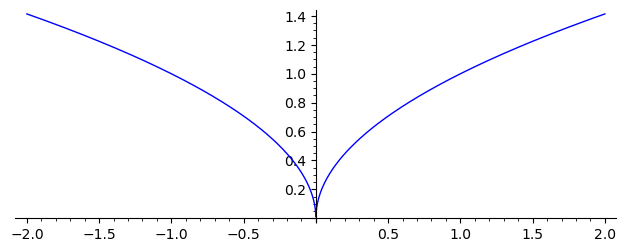

In [ ]:
plot(f(x), (x, -2, 2), aspect_ratio=1)

**Question 2**

Write an efficient recursive function to evaluate
      $a(n) = a(n-1) + a(n-2) + a(n-3)$,
with $a(0) = 0$, $a(1) = 1$, $a(2) = 3$.

Make sure your function can compute $a(100)$.

**answer to question 2**

In [ ]:
reset()

In [ ]:
def a(n, D={}):
    """
    Memoized version of the function a(n).
    """
    if n in D:
        return D[n]
    else:
        if n == 0:
            result = 0
        elif n == 1:
            result = 1
        elif n == 2:
            result = 3
        else:
            result = a(n-1) + a(n-2) + a(n-3)
        D[n] = result
        return result

In [ ]:
[a(k) for k in range(10)]

[0, 1, 3, 4, 8, 15, 27, 50, 92, 169]

In [ ]:
a(100)

204729056034782332665945880

### Quiz 5

MCS 320 Quiz 5 Wednesday 16 July 2025

**Question 1**

Consider 
$\displaystyle f_k(x_1, x_2, \ldots, x_n) = 
 x_{k-1} + 2 x_k - x_{k+1}$, where $x_0 = 0$ and $x_{n+1} = 0$.

Define a function ``F`` which takes on input a list ``X`` of variables
and an index ``k`` in the range of ``X``.
``F(X, k)``  returns $f_k(x_1, x_2, \ldots, x_n)$.

Show that your function works for $n = 8$.

**answer to question 1**

In [ ]:
X = [var('x' + str(k)) for k in range(1, 9)]
X

[x1, x2, x3, x4, x5, x6, x7, x8]

In [ ]:
F = lambda X, k: 2*X[k-1] - (X[k] if k < len(X) else 0) + (X[k-2] if k > 1 else 0)

In [ ]:
for k in range(1, 9):
    print(F(X, k))

2*x1 - x2
x1 + 2*x2 - x3
x2 + 2*x3 - x4
x3 + 2*x4 - x5
x4 + 2*x5 - x6
x5 + 2*x6 - x7
x6 + 2*x7 - x8
x7 + 2*x8


**Question 2**

Compute the slope of the tangent line to the curve
$x^2 - 2 x y + y + 5 = 0$ at the point $(2, 3)$.

**answer to question 2**

In [ ]:
x, y = var('x, y')
curve = x^2 - 2*x*y + y + 5
curve

x^2 - 2*x*y + y + 5

In [ ]:
tc = taylor(curve, (x, 2), (y, 3), 1)
tc

-2*x - 3*y + 13

In [ ]:
slope = -tc.coefficient(x, 1)/tc.coefficient(y, 1)
slope

-2/3

### Quiz 6

MCS 320 Quiz Wednesday 23 July 2025

**Question 1**

Plot $(x^2 + y^2)^3 - 4 x^2 y^2 = 0$ for $x$ and $y$ in $[-1, +1]$.

1. Convert into polar coordinates and plot.

2. Describe the difference between the two plots.

**answer to question 1**

In [ ]:
x, y = var('x, y')
curve = (x^2 + y^2)^3 - 4*x^2*y^2
curve

-4*x^2*y^2 + (x^2 + y^2)^3

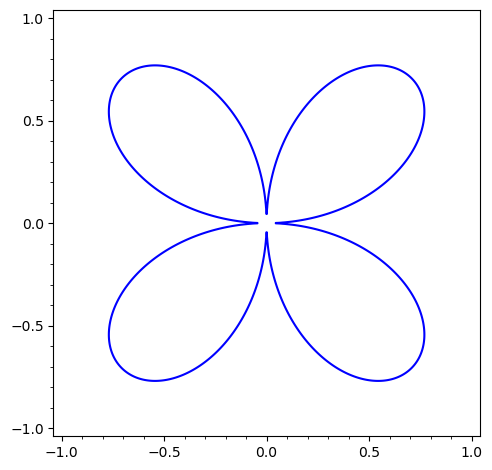

In [ ]:
implicit_plot(curve, (x, -1, 1), (y, -1, 1), plot_points=1000)

Even with 1000 points, the origin does not seem to belong to the curve.

We transform to polar coordinates.

In [ ]:
r, t = var('r, t')
pc = curve(x=r*cos(t), y=r*sin(t))
pc

-4*r^4*cos(t)^2*sin(t)^2 + (r^2*cos(t)^2 + r^2*sin(t)^2)^3

In [ ]:
sol = solve(pc, r)
sol

[r == -2*cos(t)*sin(t)/(cos(t)^2 + sin(t)^2)^(3/2), r == 2*cos(t)*sin(t)/(cos(t)^2 + sin(t)^2)^(3/2), r == 0]

In [ ]:
s0 = sol[0].rhs()
s0

-2*cos(t)*sin(t)/(cos(t)^2 + sin(t)^2)^(3/2)

In [ ]:
f0 = s0.full_simplify()
f0

-2*cos(t)*sin(t)

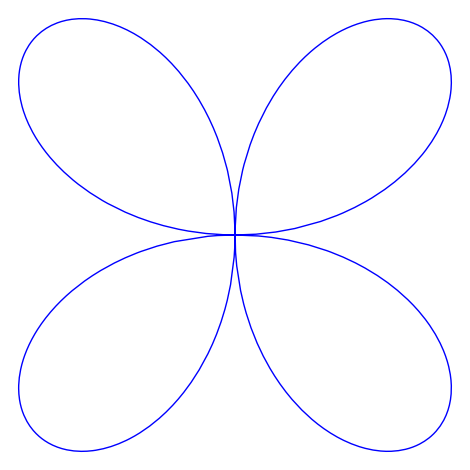

In [ ]:
polar_plot(f0, (t, 0, 2*pi), axes=False)

Compared to the implicit plot, this looks much nicer, without having to require more plot points.

**Question 2**

Consider the polynomial system

$$
  \left\{
    \begin{array}{rcl}
       x^2 - 2 x y + 3 y^3 - 3 & = & 0 \\
       x y + x - 4 & = & 0.
    \end{array}
  \right.
$$

1. Bring the system into triangular form via a Groebner basis.

2. Use the triangular form to justify the number of solutions.

3. Solve the system.

**answer to question 2**

In [ ]:
reset()

In [ ]:
P.<x,y> = PolynomialRing(QQ, order='lex')

In [ ]:
f = [x^2 - 2*x + 3*y^3 - 3, x*y + x - 4]
show(f)

[x^2 - 2*x + 3*y^3 - 3, x*y + x - 4]

In [ ]:
J = Ideal(f)
J

Ideal (x^2 - 2*x + 3*y^3 - 3, x*y + x - 4) of Multivariate Polynomial Ring in x, y over Rational Field

In [ ]:
g = J.groebner_basis()
show(g)

[x + 3/4*y^4 + 3/4*y^3 - 3/4*y - 11/4, y^5 + 2*y^4 + y^3 - y^2 - 14/3*y + 5/3]

From the last two questions, we observe

1. The last equation is a fifth degree polynomial only in $y$, and

2. The second to last equation allows to express $x$ in function of $y$.

So, for each of the five roots of the last equation, we have one corresponding $x$ value.
Therefore, we expect five solutions of the system.  Let us solve the system.

In [ ]:
sols = J.variety(QQbar)
sols

[{y: 1, x: 2},
 {y: -1.961333621253331?, x: -4.160886409844931?},
 {y: 0.3475954037437496?, x: 2.968249957581939?},
 {y: -0.6931308912452093? - 1.401519354728868?*I, x: 0.5963182261314966? + 2.723478876359302?*I},
 {y: -0.6931308912452093? + 1.401519354728868?*I, x: 0.5963182261314966? - 2.723478876359302?*I}]

Indeed, we have five solutions: one is (2, 1), two are real, and two are complex conjugated.